In [30]:
import pandas as pd
df= pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [32]:
df.select_dtypes('object')

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


In [33]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [34]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [35]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [36]:
df.duplicated().sum()

127

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.duplicated().sum()

0

In [39]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [40]:
x= df.drop(['Performance Index'],axis=1)
y=df['Performance Index']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [42]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le= LabelEncoder()

x_train['Extracurricular Activities']=le.fit_transform(x_train['Extracurricular Activities'])

In [45]:
x_test['Extracurricular Activities'] = le.transform(x_test['Extracurricular Activities'])

In [46]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6099,4,64,1,5,5
106,7,90,1,4,1
9265,6,73,1,6,1
4707,3,43,0,6,8
2155,9,76,0,9,8
...,...,...,...,...,...
8732,2,42,1,4,7
3112,3,60,1,5,9
5297,2,99,1,8,1
6116,7,94,1,6,6


In [47]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.9887391160677558, 0.9884301209927054)

In [50]:
from sklearn.metrics  import mean_squared_error
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)

(4.144574536244127, 4.305900938538477)

# polynomial

In [51]:
df1= pd.read_csv('Position_Salaries.csv')
df1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [52]:
df1.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [53]:
df1.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [59]:
x= df1['Level'].values
y= df1['Salary'].values


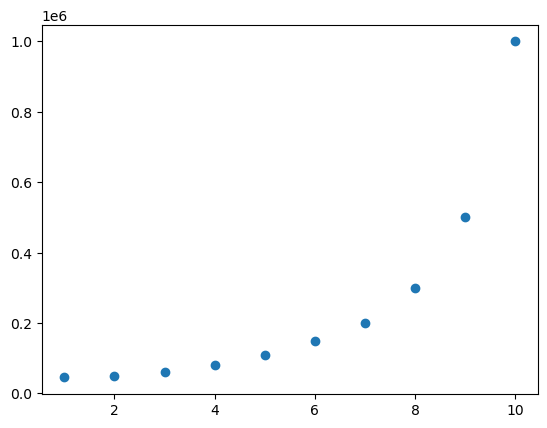

In [61]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [64]:
model= LinearRegression()
model.fit(x.reshape(-1,1),y)
model.score(x.reshape(-1,1),y)

0.6690412331929895

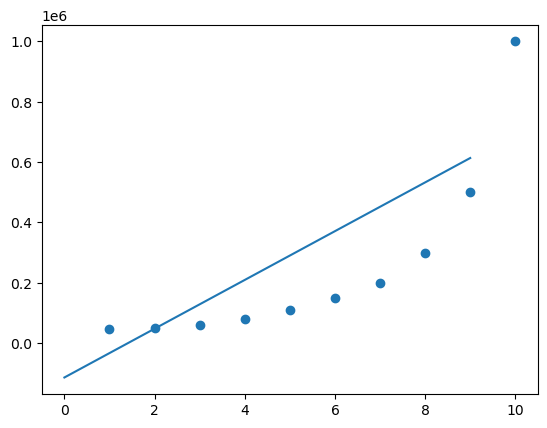

In [66]:
pred=model.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.plot(pred)

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(4)
x_poly = poly.fit_transform(x.reshape(-1,1))

In [74]:
model.fit(x_poly,y)
model.score(x_poly,y)

0.9973922891706614

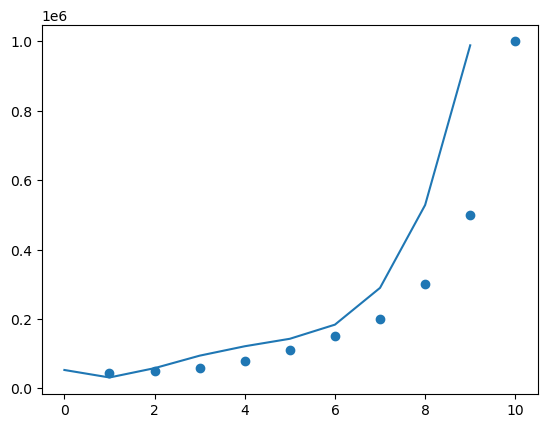

In [75]:
pred=model.predict(x_poly)
plt.scatter(x,y)
plt.plot(pred)